In [6]:
import os
import torchaudio

os.makedirs("librispeech", exist_ok=True)

dataset = torchaudio.datasets.LIBRISPEECH(
    root="librispeech",
    url="dev-clean",
    download=True
)

waveform, sample_rate, transcript, *_ = dataset[0]
print(f"Sample Rate: {sample_rate}")
print(f"Transcript: {transcript}")

torchaudio.save("sample.wav", waveform, sample_rate)
print("Saved as sample.wav")

try:
    from IPython.display import Audio
    display(Audio("sample.wav"))
except:
    pass

Sample Rate: 16000
Transcript: MISTER QUILTER IS THE APOSTLE OF THE MIDDLE CLASSES AND WE ARE GLAD TO WELCOME HIS GOSPEL
Saved as sample.wav


AUDIO LOADING AND PLAYBACK


In [7]:
import librosa
import IPython.display as ipd

filename = "sample.wav"
audio, sr = librosa.load(filename, sr=None)

duration = len(audio) / sr
print(f"Sample Rate: {sr} Hz")
print(f"Duration: {duration:.2f} seconds")

ipd.Audio(audio, rate=sr)

Sample Rate: 16000 Hz
Duration: 5.86 seconds


VISUALIZATION

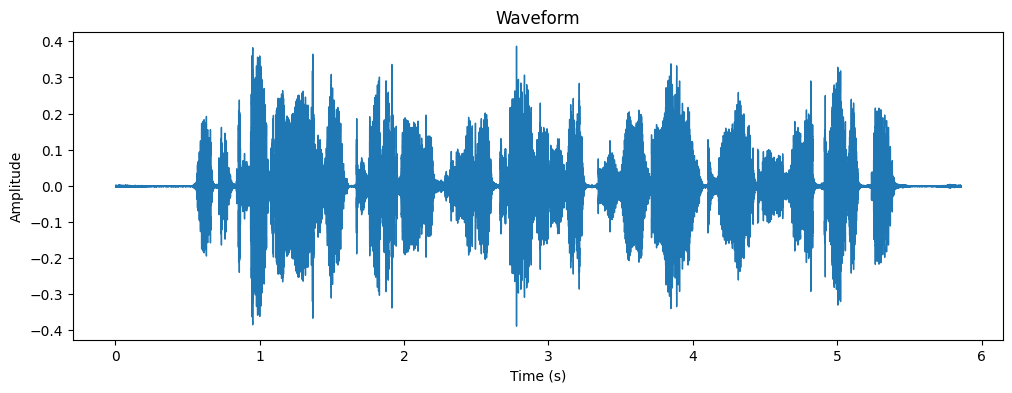

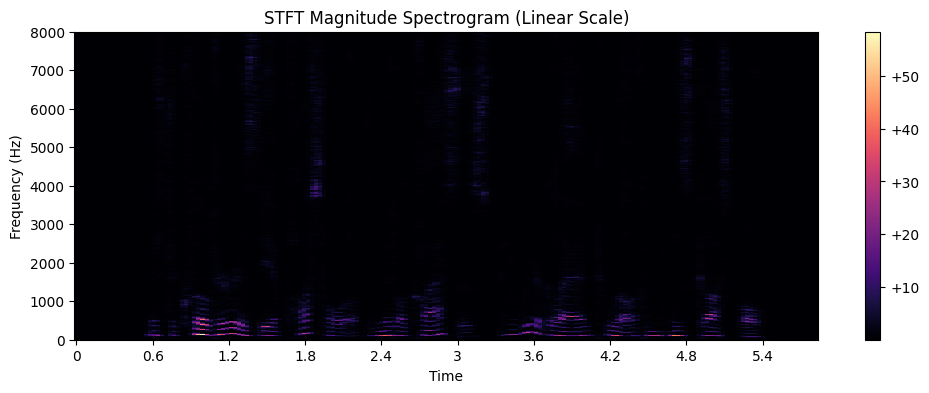

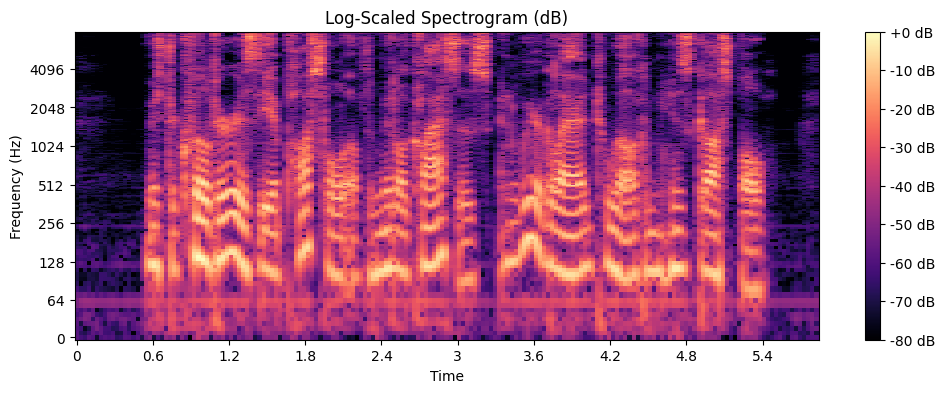

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

filename = "sample.wav"
audio, sr = librosa.load(filename, sr=None)

plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

D = np.abs(librosa.stft(audio))

plt.figure(figsize=(12, 4))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format="%+2.0f")
plt.title("STFT Magnitude Spectrogram (Linear Scale)")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.show()

DB = librosa.amplitude_to_db(D, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Log-Scaled Spectrogram (dB)")
plt.xlabel("Time")
plt.ylabel("Frequency (Hz)")
plt.show()

FEATURE EXTRACTION

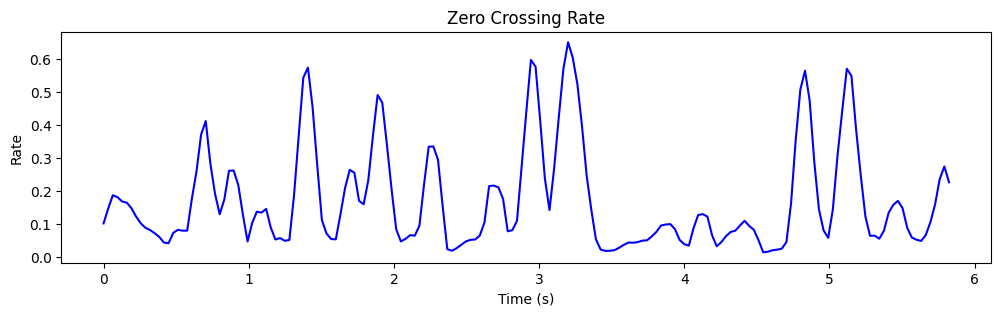

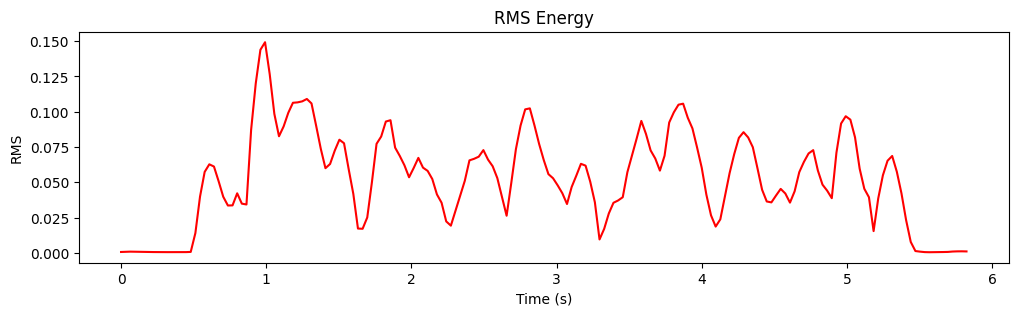

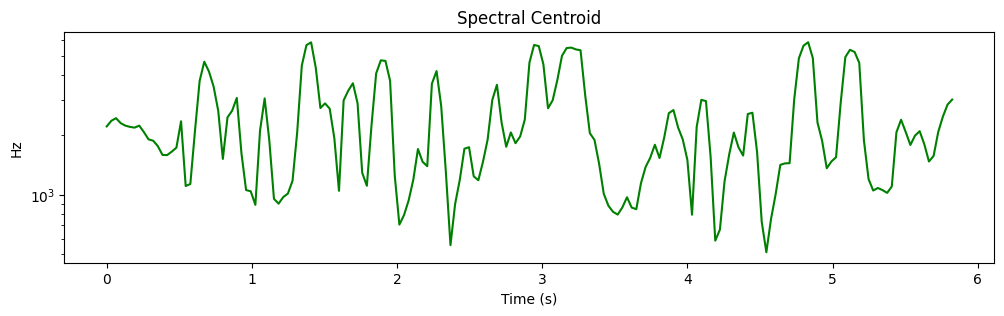

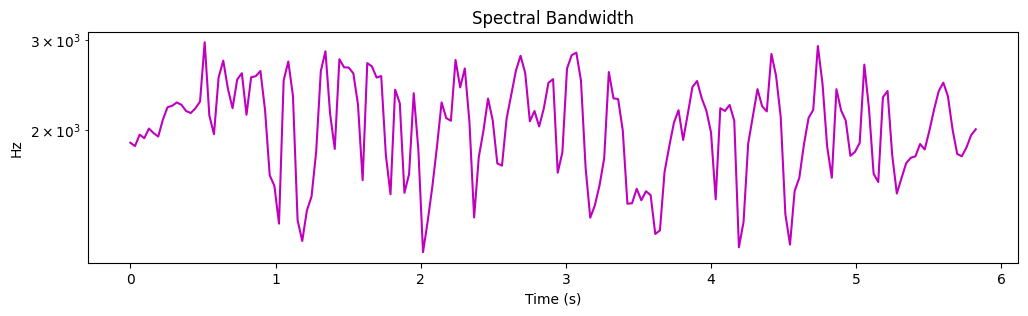

In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

filename = "sample.wav"
audio, sr = librosa.load(filename, sr=None)
frames = range(len(audio))
t = librosa.frames_to_time(frames, sr=sr)

zcr = librosa.feature.zero_crossing_rate(audio)[0]

plt.figure(figsize=(12, 3))
plt.plot(t[:len(zcr)], zcr, color='b')
plt.title("Zero Crossing Rate")
plt.xlabel("Time (s)")
plt.ylabel("Rate")
plt.show()

rms = librosa.feature.rms(y=audio)[0]

plt.figure(figsize=(12, 3))
plt.plot(t[:len(rms)], rms, color='r')
plt.title("RMS Energy")
plt.xlabel("Time (s)")
plt.ylabel("RMS")
plt.show()

spec_centroid = librosa.feature.spectral_centroid(y=audio, sr=sr)[0]

plt.figure(figsize=(12, 3))
plt.semilogy(t[:len(spec_centroid)], spec_centroid, color='g')
plt.title("Spectral Centroid")
plt.xlabel("Time (s)")
plt.ylabel("Hz")
plt.show()

spec_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)[0]

plt.figure(figsize=(12, 3))
plt.semilogy(t[:len(spec_bandwidth)], spec_bandwidth, color='m')
plt.title("Spectral Bandwidth")
plt.xlabel("Time (s)")
plt.ylabel("Hz")
plt.show()

MFCCs

MFCCs shape: (13, 183)


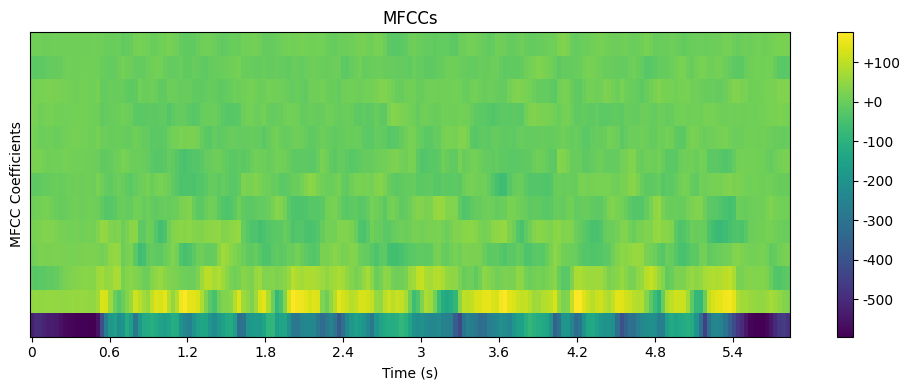

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

filename = "sample.wav"
audio, sr = librosa.load(filename, sr=None)

mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

print("MFCCs shape:", mfccs.shape)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='viridis')
plt.colorbar(format="%+2.0f")
plt.title("MFCCs")
plt.xlabel("Time (s)")
plt.ylabel("MFCC Coefficients")
plt.tight_layout()
plt.show()

AUDIO MANIPULATION

In [11]:
import librosa
import soundfile as sf

filename = "sample.wav"
audio, sr = librosa.load(filename, sr=None)

time_stretched = librosa.effects.time_stretch(audio, rate=1.5)

pitch_shifted = librosa.effects.pitch_shift(audio, sr=sr, n_steps=2)

sf.write("sample_pitch_shifted.wav", pitch_shifted, sr)
print("Saved: sample_pitch_shifted.wav")

sf.write("sample_time_stretched.wav", time_stretched, sr)
print("Saved: sample_time_stretched.wav")

Saved: sample_pitch_shifted.wav
Saved: sample_time_stretched.wav


In [12]:
from IPython.display import Audio

print("Pitch-Shifted (+2 semitones)")
display(Audio("sample_pitch_shifted.wav"))

print("Time-Stretched (1.5x)")
display(Audio("sample_time_stretched.wav"))

Pitch-Shifted (+2 semitones)


Time-Stretched (1.5x)
